_Aurélien Pion_

In [93]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from mixture import gaussian_mixture

In [2]:
SEED = 0

In [4]:
class Graph:
    """encode a graph
    
    Parameters:
    ...
    """
    def __init__(self, sizes, p, seed=0):
        self.order = np.sum(np.array([size for size in sizes]))
        self.sizes = sizes
        self.node = None
        self.adjacency_matrix = None
        self.p = p
        self.seed = seed
        
    def generate_graph(self):
        self.node = nx.stochastic_block_model(self.sizes, self.p, seed=self.seed)
        self.adjacency_matrix = nx.adjacency_matrix(self.node).todense()

class GraphSet:
    """set of graphs
    """
    
    def __init__(self, partitions, probas, T, S, seed=0):
        self.partitions = partitions
        self.probas = probas
        self.seed = seed
        self.graphs = []
        self.T = T
        self.S = S
        
    def generate_graphs(self):
        for t in range(self.T):
            for s in range(self.S):
                graph = Graph(self.partitions[t], self.probas[t])
                graph.generate_graph()
                self.graphs.append(graph)

In [5]:
partitions = [[30, 20], [10, 23]]
probas = [[[0.67, 0.1], [0.1, 0.6]], [[0.39, 0.01], [0.01, 0.76]]]
graph_set = GraphSet(partitions, probas, 2, 3)
graph_set.generate_graphs()

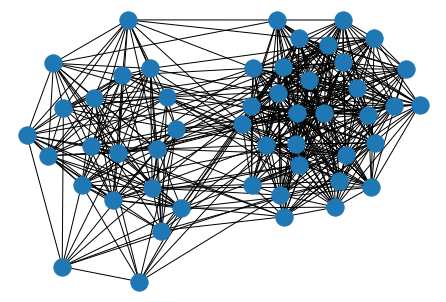

In [6]:
nx.draw(graph_set.graphs[0].node)

In [7]:
a = np.array([1]*4)
a.reshape(2,2)
a

array([1, 1, 1, 1])

In [4]:
def sample_minibatch(Graphs, B):
    sample = random.sample(range(Graphs.T+Graphs.S), B)
    return [Graphs.graphs[s] for s in sample]



#def step_size(gammma_0, gradient, kwargs**)

C = np.array([[0,1, 0], [1,0, 0], [0,0,0]])
C_bar = np.array([[0,1, 1], [0,1, 1], [1,1,0]])
T = np.array([[0.2,.3,.9], [1.1,2.4,1.4], [1.6,1.4,1.9]])


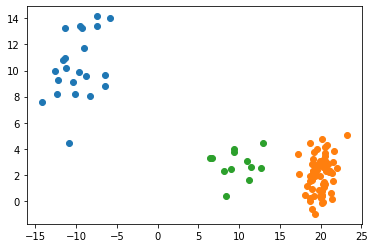

In [119]:
m = 3
n = 100
alpha = [0.2, 0.7, 0.1]
d = 2
mu = [[-10, 10], [20, 2], [10, 3]]
sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]
X = gaussian_mixture(n, d, alpha, mu, sigma, True)

x = [[] for i in range(len(alpha))]
y = [[] for i in range(len(alpha))]
for z in X:
    x[z[1]].append(z[0][0])
    y[z[1]].append(z[0][1])

for i in range(len(alpha)):
    plt.plot(x[i], y[i], 'o')
plt.show()

In [141]:
def matrix_neighboor(X):
    n = len(X)
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i != j:
                C[i][j] = np.linalg.norm(X[i] - X[j])
    return C

m = 3
n = 100
alpha = [0.2, 0.7, 0.1]
d = 2
mu = [[-10, 10], [20, 2], [10, 3]]
sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]
X = gaussian_mixture(n, d, alpha, mu, sigma)
C = matrix_neighboor(X)
C_bar = np.zeros((n, n))
C_bar[0][0] = .1
C_bar[1][1] = .1
C_bar[2][2] = .1
#C_bar = np.eye(n)
C_bar = C
T = np.zeros((n,n))
for i in range(n):
    T[i][i] = 1/n
h = np.array([1/n for i in range(n)])

solver = CG_solver(T, C, C_bar, h)
T = solver.run(0.01)
one = np.array([1 for i in range(n)])
np.sum(T.T@one)
T@one

0.0


array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [ ]:
def graph_sampler(N):
    returnp.zeros([])

In [132]:
class CG_solver:
    """cg solver
    """
    def __init__(self, T_0, C, C_bar, h):
        self.T = T_0
        self.C = C
        self.C_bar = C_bar
        self.N, self.K = C.shape
        self.h = h
        
    def L(self, i, j):
        """
        compute the matrix [[(C_ij - C_bar_11)...]... [...(C_ij - C_bar_kl)...]...]
        -> fix if and compute for all C_bar_kl
        """
        return np.square(np.array([self.C[i][j]]*self.N*self.K) - self.C_bar.reshape(self.N*self.K))
    
    def gradient(self, T):
        G = [0 for i in range(self.N*self.K)]
        for i in range(self.N):
            for j in range(self.K):
                G[i+self.N*j] = np.sum(self.L(i, j)*T.reshape(self.N*self.K))
        return 2*np.array(G).reshape(self.N,self.K)

    def direction(self, G):
        """G symmetric !!!!
        """
        n, k = G.shape
        A_sum = np.zeros((k, k))
        A_sum[:][0] = np.array([1 for i in range(k)]) 
        b_eq = np.array([0 for i in range(k)])
        b_eq[0] = 1
        X = []
        for i in range(n):
            x_i = linprog(G[i], A_ub=-np.eye(k), b_ub=np.array([1 for i in range(k)]), A_eq = A_sum, b_eq = b_eq).x
            X.append(self.h[i]*x_i)
        return np.array(X)
        #return np.array([g_i/np.linalg.norm(g_i) for g_i in G])


    def optimal_step(self, X):
        """return gamma
        """
        b = np.trace(1/2*self.gradient(self.T)@(X-self.T) + 1/2*self.gradient( X-self.T)@self.T)
        a = np.trace(1/2*self.gradient(X-self.T)@(X-self.T))
        gamma = 0
        if a > 0:
            gamma = min(1, max(0, -b/(2*a)))
        else:
            if a+b < 0:
                gamma = 1
            
        return gamma
    
    def run(self, epsilon):
        T_0 = 1000*self.T
        Max_ITER = 1000
        iter_n = 0
        while np.trace((self.T-T_0)@(self.T-T_0)) > epsilon**2 and iter_n < Max_ITER:
            T_0 = self.T
            G = self.gradient(self.T)
            X = self.direction(G)
            gamma = self.optimal_step(X)
            self.T = (1-gamma)*self.T + gamma*X
            iter_n += 1
            print(np.trace((self.T-T_0)@(self.T-T_0)))
        return self.T

        
    
C = np.array([[0,1, 1], [1,0, 0], [1,0,0]])
C_bar = np.array([[1, 0, 0], [0, 1, 0], [0,0,1]])
T = np.array([[1/3,0,0], [1/4,0,0], [0,3/12,2/12]])
h = np.array([1/3, 1/4, 5/12])
solver = CG_solver(T, C, C_bar, h)
T = solver.run(0.001)
one = np.array([1 for i in range(3)])
np.sum(T.T@one)
T.T@one

0.013392855189632433
5.584388179092953e-05
0.0


array([0.42003107, 0.30443409, 0.27553484])

In [87]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
class CG_solver_w:
    
    def __init__(self, C, C_0_set, T, w_0, lbda):
        self.C = C
        self.N, self.K = C.shape
        self.T = T
        self.s = len(C_0_set)
        self.C_bar_0_set = C_0_set
        self.w = w_0
        self.s = len(C_0_set)
        self.lbda = lbda
        
    def L(self, k, l):
        sum_C_bar = np.sum(np.array([self.w[s]*self.C_bar_0_set[s][k][l] for s in range(self.s)]))
        coeff = 0
        for i in range(self.K):
            for j in range(self.N):
                coeff += (sum_C_bar - self.C[i][j])*self.T[i][k]*self.T[l][j]
        return coeff*np.array([self.C_bar_0_set[s][k][l] for s in range(self.s)])
        
    def gradient(self):
        res = np.array([0. for s in range(self.s)])
        for k in range(self.K):
            for l in range(self.N):
                res += self.L(k,l)
        return 2*(-self.lbda*self.w + res)
    
    # solve the LP step in Frank Wolf algo
    
    def lp_step(self, grad):
        A_sum = np.zeros((self.s, self.s))
        A_sum[:][0] = np.array([1 for i in range(self.s)]) 
        b_eq = np.array([0 for i in range(self.s)])
        b_eq[0] = 1
        return linprog(grad, A_ub=-np.eye(self.s), b_ub=np.array([1 for i in range(self.s)]), A_eq = A_sum, b_eq = b_eq).x

    def run(self, epsilon):
        w_0 = 2*self.w
        k = 1
        while np.linalg.norm(w_0 - self.w) > epsilon:
            w_0 = self.w
            grad = self.gradient()
            x = self.lp_step(grad)
            gamma = 2/(k+2)
            self.w = (1 - gamma)*self.w + gamma*x
            k += 1
        return self.w
    
    
C = np.array([[0,1, 0], [1,0, 0], [0,0,0]])
C_bar0 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
C_bar1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
C_bar2 = np.array([[0, 0, 1], [1, 0, 1], [0, 1, 0]])
C_0_set = [C_bar0, C_bar1, C_bar2]
w_0 = np.array([1/3 for i in range(3)])
test = CG_solver_w(C, C_0_set, T, w_0, 1)
test.run(.01)

array([6.73402650e-05, 6.53804714e-01, 3.46127947e-01])

In [8]:
C_bar0 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
T = np.array([[0.2,.3,.9], [1.1,2.4,1.4], [1.6,1.4,1.9]])
C_bar0*T

array([[0. , 0.3, 0.9],
       [1.1, 0. , 1.4],
       [1.6, 1.4, 0. ]])

In [36]:
class GDL:
    def __init__(self, C_set, h_set, s, epsilon=0.01):
        self.C_set = C_set
        self.N, self.K = C_set[0].shape
        self.h_set = h_set
        self.s = s
        self.T_set = [np.eye(self.N) for i in range(len(C_set))]
        self.C_bar_set = [np.random.randint(2, size=(self.N,self.K)) for _ in range(self.s)]
        self.w_set = [np.array([1/s for _ in range(s)]) for _ in range(len(C_set))]
        self.minibatch = None
        self.epsilon = epsilon
        
    def sample_minibatch(self, B):
        self.minibatch = random.sample(range(len(self.C_set)), B)

    def computeTW(self):
        for k in self.minibatch:
            self.T_set[k] = CG_solver(self.T_set[k], self.C_set[k], self.sum_C_bar(k)).run(self.epsilon)
            self.w_set[k] = CG_solver_w(self.C_set[k], self.C_bar_set, self.T_set[k], self.w_set[k], 10).run(self.epsilon)
            print("wk =", k,  self.w_set[k])
    
    def sum_C_bar(self, k):
        res = np.zeros((self.N, self.K))
        for s in range(self.s):
            res += self.w_set[k][s]*self.C_bar_set[s]
        return res
                                 
    def gradient(self, s):
        B = len(self.minibatch)
        one = np.ones(self.N)
        sum_inter = np.zeros((self.N, self.K))
        for k in self.minibatch:
            sum_inter += self.w_set[k][s]*(self.sum_C_bar(k)*(np.outer(self.T_set[k].T@one, (self.T_set[k].T@one))) - (self.T_set[k].T)@self.C_set[k]@self.T_set[k])
        return 2/B*sum_inter
    
    def update_C_bar(self, s):
        delta_C = self.gradient(s)
        self.C_bar_set[s] = 1/2*(self.C_bar_set[s] - delta_C + (self.C_bar_set[s] - delta_C).T)
    
    def run(self, maxIter, B):
        for i in range(maxIter):
            print(i)
            self.sample_minibatch(B)
            self.computeTW()
            for s in range(self.s):
                self.update_C_bar(s)
            norm = 0
            for s in range(self.s):
                norm += np.trace(self.C_bar_set[s]@self.C_bar_set[s].T)
            #for w in self.w_set:
            #    norm += np.linalg.norm(w)
            print(norm)
        return (self.C_bar_set, self.w_set)
    
    

In [38]:
C_0 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
C_1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
C_2 = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
C = np.array([[0,1, 0], [1,0, 0], [0,0,0]])
C_set = [C, C_0, C_1, C_2]
s = 4
h_set = [np.array([1/s for _ in range(3*3)]) for _ in range(len(C_set))]


solver = GDL(C_set, h_set, s)
#solver.run(40, 4)

In [39]:
C = np.array([[0,1, 0], [1,0, 0], [0,0,0]])
T = np.array([[0.2,.3,.9], [1.1,2.4,1.4], [1.6,1.4,1.9]])

In [43]:
T@C

array([[0.3, 0.2, 0. ],
       [2.4, 1.1, 0. ],
       [1.4, 1.6, 0. ]])